In [139]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import json

In [140]:
raw_data = pd.read_csv("./Dataset/student_spending.csv")
raw_data

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,998,22,Non-binary,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App


In [141]:
raw_data.isnull().sum()

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [142]:
raw_data.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


In [143]:
raw_data.dropna(axis=0, how='any',inplace=True)
raw_data.drop(columns=['Unnamed: 0',"year_in_school",'major',"preferred_payment_method"], inplace=True)


In [144]:
expense_data = raw_data.iloc[:,4:-1]
expense_data.drop('tuition',axis=1,inplace=True)
expense_data['sum_of_expense'] = expense_data.sum(axis=1)
expense_data

,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,sum_of_expense
0,709,296,123,188,41,78,134,127,1696
1,557,365,85,252,74,92,226,129,1780
2,666,220,137,99,130,23,239,112,1626
3,652,289,114,223,99,30,163,105,1675
4,825,372,168,194,48,71,88,71,1837
...,...,...,...,...,...,...,...,...,...
995,969,152,194,151,42,38,252,65,1863
996,508,265,52,206,40,98,274,84,1527
997,723,339,139,69,112,46,284,57,1769
998,543,237,123,200,129,90,190,101,1613


In [145]:
summary_data = pd.concat([raw_data.drop(raw_data.iloc[:,4:],axis=1),expense_data['sum_of_expense']],axis=1)

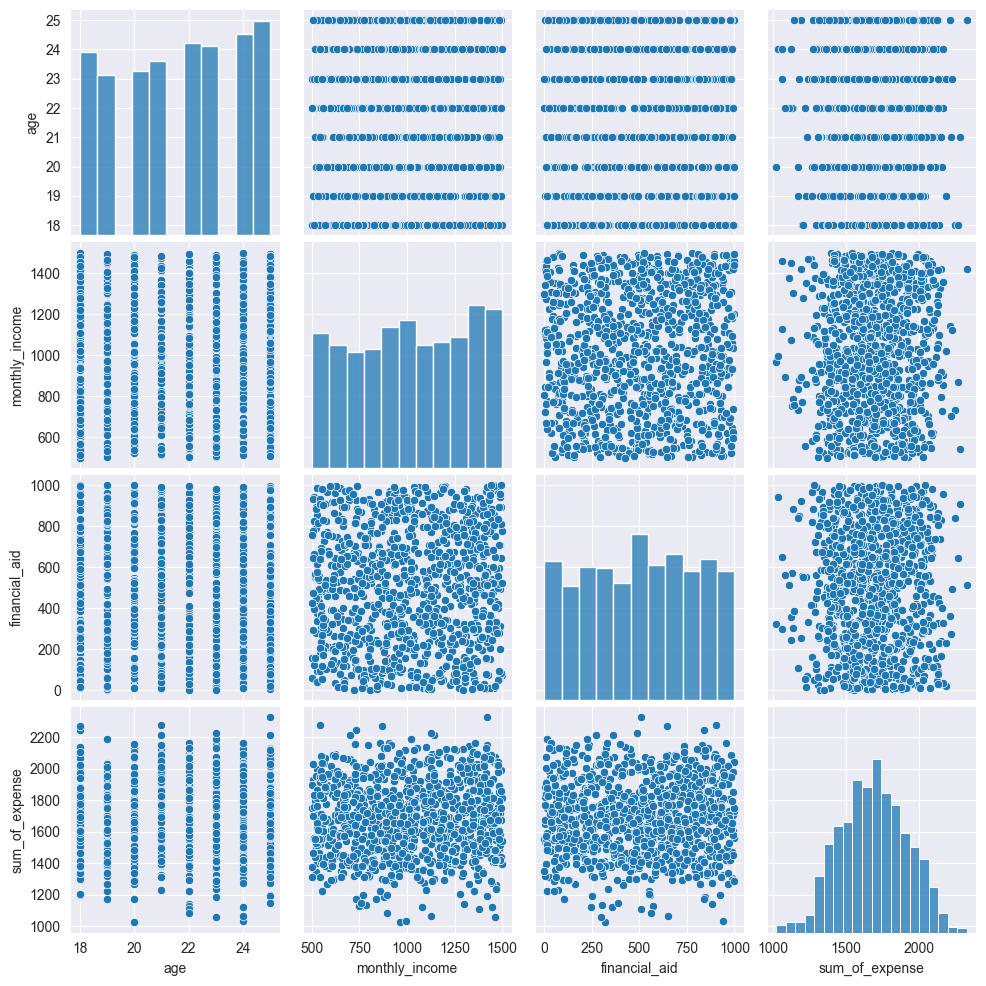

In [146]:
sns.pairplot(summary_data)

In [147]:
summary_data_corr = summary_data.copy()
summary_data_corr["gender"]=summary_data_corr["gender"].astype('category').cat.codes
summary_data_corr.corr()

,age,gender,monthly_income,financial_aid,sum_of_expense
age,1.000000,0.028100,-0.015448,-0.022263,0.034572
gender,0.028100,1.000000,0.008636,-0.018788,0.024155
monthly_income,-0.015448,0.008636,1.000000,0.037050,0.006953
financial_aid,-0.022263,-0.018788,0.037050,1.000000,0.000717
sum_of_expense,0.034572,0.024155,0.006953,0.000717,1.000000


In [148]:
summary_data_x = summary_data.iloc[:,0:-1]
summary_data_y = summary_data.iloc[:,-1]

C:\Users\tongc\AppData\Local\Temp\ipykernel_31280\1286213823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(summary_data_y)


<Axes: xlabel='sum_of_expense', ylabel='Density'>

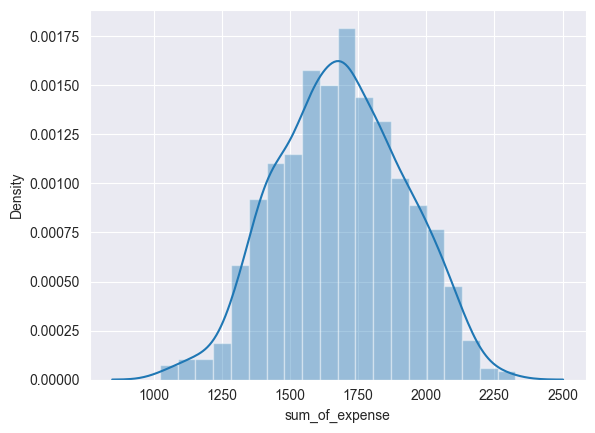

In [149]:
sns.distplot(summary_data_y)

In [150]:
train_x, test_x, train_y, test_y = train_test_split(summary_data_x,summary_data_y,test_size=0.1,random_state=40)

In [151]:
onehot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()
onehot_feature = ["gender"]
standard_scaler_feature = ["age","monthly_income","financial_aid"]
train_x['gender'] = train_x['gender'].astype(str)

In [152]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_feature),
        ('scaler', StandardScaler(), standard_scaler_feature)
    ])


In [155]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])
pipeline.fit(train_x,train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'monthly_income',
                                                   'financial_aid'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [156]:
test_y

204    2126
71     1828
594    1838
672    1437
14     1397
       ... 
92     1910
894    1416
916    1551
236    1622
492    1223
Name: sum_of_expense, Length: 100, dtype: int64

In [157]:
test_predictions = pipeline.predict(test_x)
print(test_predictions)
test_predictions.size

[1685.12999992 1702.53866135 1725.16642596 1768.83354515 1677.44230394
 1702.399215   1684.71110687 1648.73083107 1536.1178555  1680.78552322
 1723.49083629 1676.69663222 1696.61053244 1697.08107106 1739.6667981
 1700.27981559 1700.00563774 1628.999078   1723.12207665 1675.24664178
 1756.04443708 1646.18487178 1729.94863771 1706.4228136  1660.9859798
 1674.84468923 1645.84738406 1669.07059512 1683.76569919 1688.43591175
 1683.11282974 1707.65702725 1702.56123997 1688.02834546 1697.74182879
 1641.66825013 1689.06754564 1722.50501988 1750.2910075  1680.64887214
 1649.12175284 1924.67731768 1751.03119054 1670.45644436 1698.60766262
 1737.03519657 1713.4459595  1761.25955374 1559.61883508 1753.84407555
 1613.35107166 1701.69740303 1734.25336309 1714.82844132 1637.56230392
 1799.69888999 1684.64951841 1620.24642908 1699.82411735 1680.31934033
 1672.23617604 1690.38743867 1657.17945947 1705.34135132 1618.30227464
 1706.45726253 1655.71565417 1631.42603421 1804.32989103 1649.26295944
 1666.40

100

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test_y, test_predictions)
mse = mean_squared_error(test_y, test_predictions)
rmse = math.sqrt(mse)
r2 = r2_score(test_y, test_predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 182.61
Mean Squared Error (MSE): 53347.50
Root Mean Squared Error (RMSE): 230.97
R-squared (R²): -0.05
